# Simple Linear Regression using numpy

### Import the relevant libraries

In [1]:
#import the relevant libraries.
import numpy as np  
import matplotlib.pyplot as plt
from platform import python_version
print(python_version())

3.8.5


### Generate random input data to train on

In [2]:
# declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs x and z.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations divided by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix of size(1000,2). 
# This is the X matrix from the linear model y = x*w1 + z*w2 + b.
# column_stack is a Numpy method, which combines two vectors(here,input vectors) into a matrix.
inputs = np.column_stack((xs,zs))

# Size of input matrix should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(1000, 2)


### Generate the targets to aim at

In [3]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# A small random noise is added to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
# Real datasets do have noises.
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise .
# In this way, the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

# The shape of the targets should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


### Initialize weights and biases

In [4]:
# Initializing the weights and biases randomly in some small initial range.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[0.08076164]
 [0.02481376]]
[-0.02652211]


### Set a learning rate

In [5]:
# Set some small learning rate. 
learning_rate = 0.02

### Train the model

In [6]:
# Iterate over our training dataset 100 times.
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.
for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    # The deltas are the differences between the outputs and the targets
    # deltas here is a vector 1000 x 1
    deltas = outputs - targets
        
    # We are considering the L2-norm loss, but divided by 2.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. This doesn't change the optimization logic.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # Print the loss function value at each step to observe whether it is decreasing as desired.
    print (loss)
    
    # Scale the deltas the same way as the loss function.
    # In this way the learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate.
    # that can remain the same if we change the number of training samples (observations).
    deltas_scaled = deltas / observations
    
    # Finally, apply the gradient descent update rules.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so as to get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights and biases are updated. 

230.55175303840124
35.39575428516467
14.213772557940082
11.54651532154471
10.870434098753647
10.42286842356647
10.014657802795499
9.62492275721174
9.25085408259661
8.891608014159138
8.546574056247817
8.215187457872183
7.8969081439077184
7.591217654343766
7.297618063249291
7.0156311420304025
6.744797577673858
6.48467622429267
6.234843384534644
5.994892119441442
5.764431585607713
5.543086398557766
5.330496021302439
5.126314177080257
4.930208285326275
4.741858919949903
4.560959289039345
4.387214735145132
4.220342255328819
4.0600700401951055
3.906137031156446
3.758292495209109
3.6162956165279794
3.479915104214928
3.3489288155617905
3.22312339421436
3.1022939226479376
2.9862435883884837
2.8747833634356055
2.7677316963652525
2.6649142166105992
2.566163450439429
2.4713185481653848
2.3802250221487857
2.2927344951602016
2.208704458696957
2.1279980408588823
2.050483783405203
1.976035427629454
1.9045317087036213
1.8358561581565427
1.7698969141648186
1.706546539347262
1.6457018457660462
1.58726372

### Print weights and biases and see if it worked correctly.

In [7]:
# Print the weights and the biases to see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be convergING. So more iterations are needed.

[[ 1.99487654]
 [-3.00053336]] [4.33218376]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

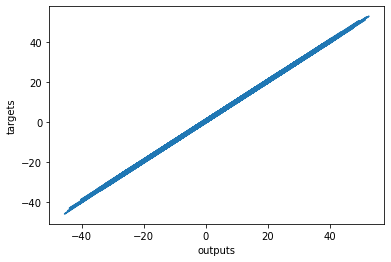

In [8]:
# Print the outputs and the targets in order to see if they have a linear relationship.

plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()